### 딥-러닝 과정 MLP | 2020.02.27. 

## 네번째 실습. Keras 모델 생성/학습 - 보스턴 집값 예측 모델

![](https://3qeqpr26caki16dnhd19sv6by6v-wpengine.netdna-ssl.com/wp-content/uploads/2016/06/Regression-Tutorial-with-Keras-Deep-Learning-Library-in-Python.jpg)

* CRIM: per capita crime rate by town  
* ZN: proportion of residential land zoned for lots over 25,000 sq.ft.
* INDUS: proportion of non-retail business acres per town.
* CHAS: Charles River dummy variable (1 if tract bounds river; 0 otherwise)
* NOX: nitric oxides concentration (parts per 10 million)
* RM: average number of rooms per dwelling
* AGE: proportion of owner-occupied units built prior to 1940
* DIS: weighted distances to five Boston employment centres
* RAD: index of accessibility to radial highways
* TAX: full-value property-tax rate per \$10,000
* PTRATIO: pupil-teacher ratio by town
* B: 1000(Bk — 0.63)² where Bk is the proportion of blacks by town
* LSTAT: % lower status of the population
* MEDV: Median value of owner-occupied homes in $1000’s

In [1]:
# 1. 데이터 불러오기
from keras.datasets import boston_housing

(X_train, y_train), (X_test, y_test) = boston_housing.load_data()

print(X_train[0])
print(y_train[0])

Using TensorFlow backend.


[  1.23247   0.        8.14      0.        0.538     6.142    91.7
   3.9769    4.      307.       21.      396.9      18.72   ]
15.2


In [2]:
# 2. Data 정규화

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(X_train_scaled[0])

[-0.27224633 -0.48361547 -0.43576161 -0.25683275 -0.1652266  -0.1764426
  0.81306188  0.1166983  -0.62624905 -0.59517003  1.14850044  0.44807713
  0.8252202 ]


In [3]:
print(X_train.shape)

(404, 13)


In [4]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout

In [5]:
# 3. MLP 모델 생성
model = Sequential()
#model.add(Dense(32, input_shape(X_train.shape[1]), activation='relu'))
model.add(Dense(32, input_dim = 13, activation='relu'))
model.add(Dense(64, activation='relu'))
#model.add(Dropout(0.3))
model.add(Dense(32, activation='relu'))
model.add(Dense(1))
#model.add(Dense(1, activation='linear'))

print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 32)                448       
_________________________________________________________________
dense_2 (Dense)              (None, 64)                2112      
_________________________________________________________________
dense_3 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 33        
Total params: 4,673
Trainable params: 4,673
Non-trainable params: 0
_________________________________________________________________
None


In [6]:
# 4. Compile - Optimizer, Loss function 설정
model.compile(loss = 'MSE', optimizer='adam', metrics=['MSE'])

In [7]:
# 5.학습시키기
from keras.callbacks import EarlyStopping

early_stop = EarlyStopping(patience=20)

history = model.fit(X_train_scaled, y_train, validation_split=0.2,  batch_size=20, nb_epoch =  500, callbacks=[early_stop])

/anaconda/envs/py35/lib/python3.5/site-packages/ipykernel/__main__.py:6: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


Train on 323 samples, validate on 81 samples
Epoch 1/500
323/323 [==============================] - 0s 1ms/step - loss: 552.5955 - MSE: 552.5955 - val_loss: 590.4329 - val_MSE: 590.4329
Epoch 2/500
323/323 [==============================] - 0s 159us/step - loss: 480.8424 - MSE: 480.8423 - val_loss: 495.9019 - val_MSE: 495.9019
Epoch 3/500
323/323 [==============================] - 0s 161us/step - loss: 353.8619 - MSE: 353.8619 - val_loss: 319.8737 - val_MSE: 319.8737
Epoch 4/500
323/323 [==============================] - 0s 159us/step - loss: 183.8578 - MSE: 183.8578 - val_loss: 144.1526 - val_MSE: 144.1526
Epoch 5/500
323/323 [==============================] - 0s 160us/step - loss: 86.3208 - MSE: 86.3207 - val_loss: 97.5671 - val_MSE: 97.5671
Epoch 6/500
323/323 [==============================] - 0s 159us/step - loss: 64.5405 - MSE: 64.5405 - val_loss: 73.9546 - val_MSE: 73.9546
Epoch 7/500
323/323 [==============================] - 0s 161us/step - loss: 47.9030 - MSE: 47.9030 - val_l

323/323 [==============================] - 0s 168us/step - loss: 6.9288 - MSE: 6.9288 - val_loss: 12.6547 - val_MSE: 12.6547
Epoch 60/500
323/323 [==============================] - 0s 163us/step - loss: 6.7205 - MSE: 6.7205 - val_loss: 12.7268 - val_MSE: 12.7268
Epoch 61/500
323/323 [==============================] - 0s 162us/step - loss: 6.7723 - MSE: 6.7723 - val_loss: 12.8931 - val_MSE: 12.8931
Epoch 62/500
323/323 [==============================] - 0s 199us/step - loss: 6.7228 - MSE: 6.7228 - val_loss: 12.4075 - val_MSE: 12.4076
Epoch 63/500
323/323 [==============================] - 0s 160us/step - loss: 7.0999 - MSE: 7.0999 - val_loss: 12.2799 - val_MSE: 12.2799
Epoch 64/500
323/323 [==============================] - 0s 158us/step - loss: 6.5140 - MSE: 6.5140 - val_loss: 12.4725 - val_MSE: 12.4725
Epoch 65/500
323/323 [==============================] - 0s 171us/step - loss: 6.4837 - MSE: 6.4837 - val_loss: 13.3095 - val_MSE: 13.3095
Epoch 66/500
323/323 [=========================

323/323 [==============================] - 0s 163us/step - loss: 4.5628 - MSE: 4.5628 - val_loss: 11.2029 - val_MSE: 11.2029
Epoch 119/500
323/323 [==============================] - 0s 161us/step - loss: 4.5810 - MSE: 4.5810 - val_loss: 11.2392 - val_MSE: 11.2392
Epoch 120/500
323/323 [==============================] - 0s 163us/step - loss: 4.7656 - MSE: 4.7656 - val_loss: 12.0218 - val_MSE: 12.0218
Epoch 121/500
323/323 [==============================] - 0s 168us/step - loss: 4.5953 - MSE: 4.5953 - val_loss: 11.1373 - val_MSE: 11.1373
Epoch 122/500
323/323 [==============================] - 0s 162us/step - loss: 4.5828 - MSE: 4.5828 - val_loss: 11.5356 - val_MSE: 11.5356
Epoch 123/500
323/323 [==============================] - 0s 162us/step - loss: 4.6492 - MSE: 4.6492 - val_loss: 10.8235 - val_MSE: 10.8235
Epoch 124/500
323/323 [==============================] - 0s 160us/step - loss: 4.4523 - MSE: 4.4523 - val_loss: 11.0659 - val_MSE: 11.0659
Epoch 125/500
323/323 [==================

323/323 [==============================] - 0s 163us/step - loss: 3.3478 - MSE: 3.3478 - val_loss: 9.4531 - val_MSE: 9.4531
Epoch 178/500
323/323 [==============================] - 0s 165us/step - loss: 3.4106 - MSE: 3.4106 - val_loss: 8.7733 - val_MSE: 8.7733
Epoch 179/500
323/323 [==============================] - 0s 162us/step - loss: 3.7000 - MSE: 3.7000 - val_loss: 8.6473 - val_MSE: 8.6473
Epoch 180/500
323/323 [==============================] - 0s 163us/step - loss: 3.4691 - MSE: 3.4691 - val_loss: 8.8036 - val_MSE: 8.8036
Epoch 181/500
323/323 [==============================] - 0s 161us/step - loss: 3.4616 - MSE: 3.4616 - val_loss: 9.2291 - val_MSE: 9.2291
Epoch 182/500
323/323 [==============================] - 0s 161us/step - loss: 3.8081 - MSE: 3.8081 - val_loss: 8.9811 - val_MSE: 8.9811
Epoch 183/500
323/323 [==============================] - 0s 160us/step - loss: 3.6454 - MSE: 3.6454 - val_loss: 8.9253 - val_MSE: 8.9253
Epoch 184/500
323/323 [==============================] 

Epoch 237/500
323/323 [==============================] - 0s 158us/step - loss: 2.3345 - MSE: 2.3345 - val_loss: 7.3403 - val_MSE: 7.3403
Epoch 238/500
323/323 [==============================] - 0s 161us/step - loss: 2.4528 - MSE: 2.4528 - val_loss: 7.7823 - val_MSE: 7.7823
Epoch 239/500
323/323 [==============================] - 0s 159us/step - loss: 2.3058 - MSE: 2.3058 - val_loss: 7.1091 - val_MSE: 7.1091
Epoch 240/500
323/323 [==============================] - 0s 159us/step - loss: 2.4069 - MSE: 2.4069 - val_loss: 8.0712 - val_MSE: 8.0712
Epoch 241/500
323/323 [==============================] - 0s 161us/step - loss: 2.6329 - MSE: 2.6329 - val_loss: 7.3361 - val_MSE: 7.3361
Epoch 242/500
323/323 [==============================] - 0s 161us/step - loss: 2.3109 - MSE: 2.3109 - val_loss: 7.2461 - val_MSE: 7.2462
Epoch 243/500
323/323 [==============================] - 0s 167us/step - loss: 2.3211 - MSE: 2.3211 - val_loss: 7.0199 - val_MSE: 7.0199
Epoch 244/500
323/323 [==================

Epoch 297/500
323/323 [==============================] - 0s 161us/step - loss: 1.8513 - MSE: 1.8513 - val_loss: 6.8749 - val_MSE: 6.8749


In [8]:
# 6. Model Evaluate
train_mse = model.evaluate(X_train_scaled, y_train)
test_mse = model.evaluate(X_test_scaled, y_test)

print(train_mse)
print(test_mse)

102/102 [==============================] - 0s 47us/step
[2.599524800140079, 2.599524736404419]
[18.564324173272826, 18.56432342529297]


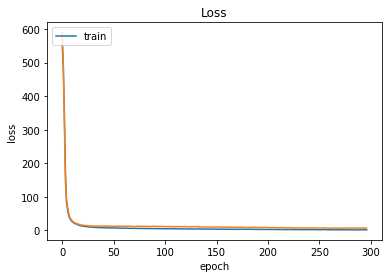

In [10]:
# 7. 학습 시각화하기
import matplotlib.pyplot as plt

#plt.plot(history.history['MSE'])
#plt.plot(history.history['val_accuracy'])
#plt.title("MSE")
#plt.ylabel('MSE')
#plt.xlabel('EPOCH')
#plt.legend(['train', 'val'], loc = 'upper left')
#plt.show()


plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc = 'upper left')
plt.show()